## Assignment 8 Group 18

### Shashank Siripragada & Tengfei Wang

In [418]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats.distributions import norm, gamma

from scipy.optimize import newton
from scipy.special import psi, polygamma


#### Let's consider a simple data set of Nutrition data on 80 Cereal products containing 4 columns. (Protien, fat, fiber, carbo)

In [419]:
df= pd.read_csv('cereal.csv')
df.set_index('name', inplace=True)
df


,protein,fat,fiber,carbo
name,,,,
100% Bran,4,1,10.0,5.0
100% Natural Bran,3,5,2.0,8.0
All-Bran,4,1,9.0,7.0
All-Bran with Extra Fiber,4,0,14.0,8.0
Almond Delight,2,2,1.0,14.0
...,...,...,...,...
Triples,2,1,0.0,21.0
Trix,1,1,0.0,13.0
Wheat Chex,3,1,3.0,17.0


In [420]:
df.describe()

,protein,fat,fiber,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,1.012987,2.151948,14.597403
std,1.094790,1.006473,2.383364,4.278956
min,1.000000,0.000000,0.000000,-1.000000
25%,2.000000,0.000000,1.000000,12.000000
50%,3.000000,1.000000,2.000000,14.000000
75%,3.000000,2.000000,3.000000,17.000000
max,6.000000,5.000000,14.000000,23.000000


In [421]:
df.isna().any()

protein    False
fat        False
fiber      False
carbo      False
dtype: bool

#### We don't have any missing values in the columns.

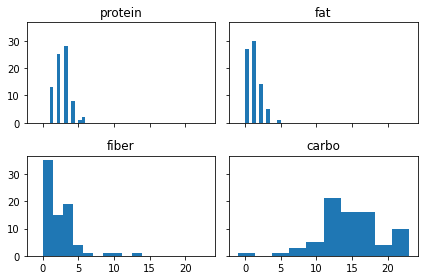

In [422]:
_= df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

#### Lets clean the data


In [423]:
# removing zeros from fat and fiber
# removing negative values in carbo

df.loc[(df.carbo < 0), 'carbo'] = df.carbo.median()

df.loc[(df.fat == 0), 'fat'] = df.fat.median()

df.loc[(df.fiber == 0), 'fiber'] = df.fiber.median()

# # df = df[(df['carbo'] >= 0) & (df['fat'] > 0) & (df['fiber'] > 0)] 
# df

In [424]:
df_mean = df.mean()
df_mean

protein     2.545455
fat         1.363636
fiber       2.645455
carbo      14.792208
dtype: float64

In [425]:
df_median = df.median()
df_median

protein     3.0
fat         1.0
fiber       2.0
carbo      14.0
dtype: float64

In [426]:
df_var = df.var()
df_var

protein     1.198565
fat         0.523923
fiber       4.281722
carbo      15.074675
dtype: float64

In [427]:
alpha_mom = df_mean ** 2 / df_var
beta_mom = df_var / df_mean
alpha_mom, beta_mom

(protein     5.405915
 fat         3.549191
 fiber       1.634489
 carbo      14.515033
 dtype: float64,
 protein    0.470865
 fat        0.384211
 fiber      1.618521
 carbo      1.019096
 dtype: float64)

#### Then, use the gamma pdf function to plot the distributions implied by the calculated alphas and betas.

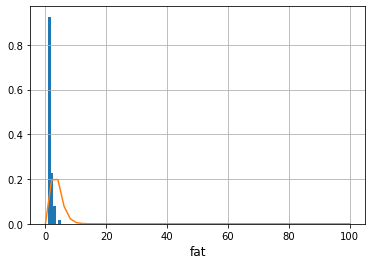

In [428]:
df.fat.hist(density=True, bins=5)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0,100), alpha_mom[1], beta_mom[1]))

plt.xlabel('fat',  fontsize = 12)

plt.show()

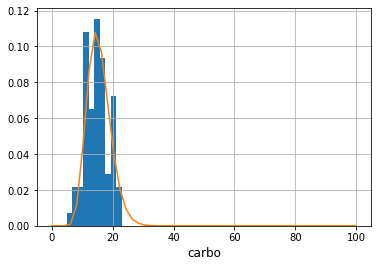

In [429]:
from scipy.stats import poisson

df.carbo.hist(density=True, bins=10)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0,100), alpha_mom[3], beta_mom[3]))

plt.xlabel('carbo',  fontsize = 12)
plt.show()

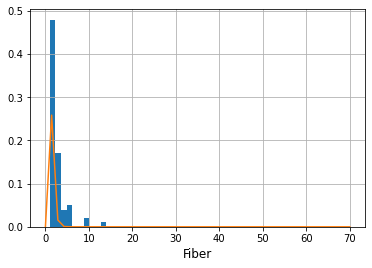

In [430]:
df.fiber.hist(density=True, bins=10)
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0,170), alpha_mom[2], beta_mom[2]))

plt.xlabel('Fiber',  fontsize = 12)
plt.show()

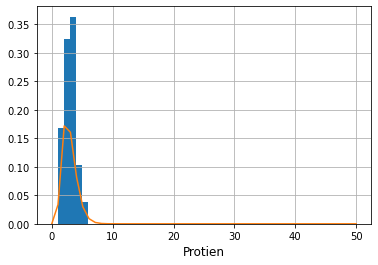

In [431]:
df.protein.hist(density=True, bins=5)
plt.plot(np.linspace(0, 50), gamma.pdf(np.linspace(0,100), alpha_mom[0], beta_mom[0]))

plt.xlabel('Protien',  fontsize = 12)
plt.show()

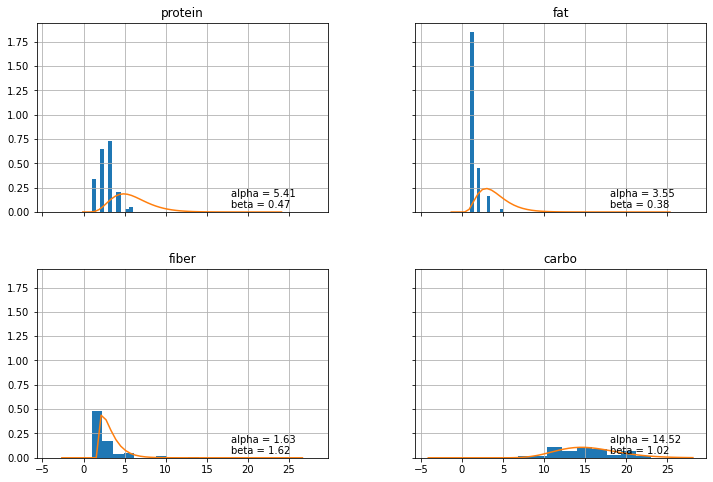

In [432]:
axs = df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=True)

for ax in axs.ravel():
    m = ax.get_title()
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(18, 0.04))
    
#plt.tight_layout()


### Let's now try with the mle approach

In [433]:

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [434]:
log_mean = np.log(df.mean())
mean_log = df.apply(np.log).mean()


# mean_log = np.log(df.replace(0, np.nan)).mean()
print(log_mean, '\n', mean_log)

protein    0.934309
fat        0.310155
fiber      0.972843
carbo      2.694101
dtype: float64 
 protein    0.836015
fat        0.218267
fiber      0.787272
carbo      2.656936
dtype: float64


In [435]:
from scipy import optimize

mean,var = df.mean(),df.var()

alpha_mom = mean ** 2 / var
beta_mom = var / mean

alpha_mle, beta_mle = [0]*len(df.columns), [0]*len(df.columns)

for i in range(len(df.columns)):
    alpha_mle[i] = newton(dlgamma, 2, dl2gamma, args=(log_mean[i], mean_log[i])) # Calculation parameter alpha
    beta_mle[i] = alpha_mle[i]/mean[i]




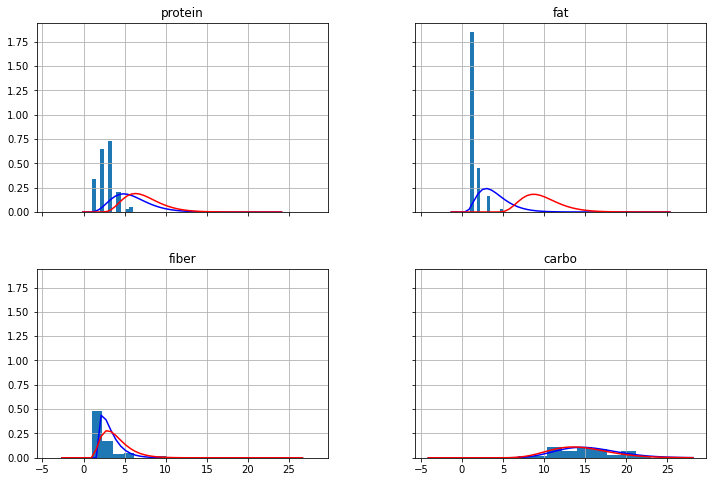

In [441]:
axs = df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=True)
i = 0
for ax in axs.ravel():
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]), 'b-')
    ax.plot(x, gamma.pdf(x, alpha_mle[i], beta_mle[i]), 'r-')
    i +=1
#     # Annotate with parameter estimates
#     label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
#     ax.annotate(label, xy=(18, 0.04))
    
#plt.tight_layout()


# df.protein.hist(density=True, bins=5)
# plt.plot(np.linspace(0,10), gamma.pdf(np.linspace(0,10), alpha_mom[0], beta_mom[0]), 'b-')
# plt.plot(np.linspace(0,10), gamma.pdf(np.linspace(0,10), alpha_mle[0], beta_mle[0]), 'r-')

# plt.xlabel('Protien',  fontsize = 12)
# plt.show()

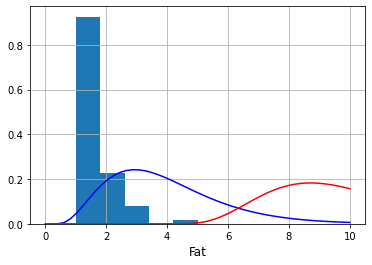

In [437]:
df.fat.hist(density=True, bins=5)
plt.plot(np.linspace(0,10), gamma.pdf(np.linspace(0,10), alpha_mom[1], beta_mom[1]), 'b-')
plt.plot(np.linspace(0,10), gamma.pdf(np.linspace(0,10), alpha_mle[1], beta_mle[1]), 'r-')

plt.xlabel('Fat',  fontsize = 12)
plt.show()

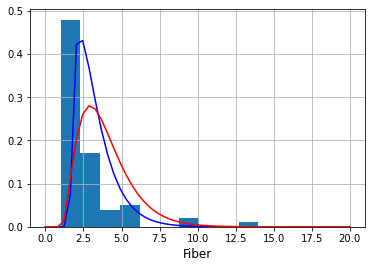

In [438]:
df.fiber.hist(density=True, bins=10)
plt.plot(np.linspace(0,20), gamma.pdf(np.linspace(0,20), alpha_mom[2], beta_mom[2]), 'b-')
plt.plot(np.linspace(0,20), gamma.pdf(np.linspace(0,20), alpha_mle[2], beta_mle[2]), 'r-')

plt.xlabel('Fiber',  fontsize = 12)
plt.show()

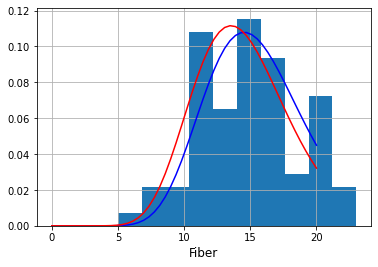

In [439]:
df.carbo.hist(density=True, bins=10)
plt.plot(np.linspace(0,20), gamma.pdf(np.linspace(0,20), alpha_mom[3], beta_mom[3]), 'b-')
plt.plot(np.linspace(0,20), gamma.pdf(np.linspace(0,20), alpha_mle[3], beta_mle[3]), 'r-')

plt.xlabel('Fiber',  fontsize = 12)
plt.show()

In [295]:
import pymc3 as pm

AttributeError: module 'arviz' has no attribute 'geweke'